In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv("C:\\Users\\admin\\Desktop\\Project\\-8thProject\\finaldataset\\dataset.csv")

FileNotFoundError: File b'C:\\Users\\admin\\Desktop\\Project\\-8thProject\\finaldataset\\dataset.csv' does not exist

In [3]:
df.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,16091,24780100,Switch1,Router,35.529786,35.529786,35.539909,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,16092,24781700,Router,server1,20.176725,20.176725,20.186848,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,16092,885060,Router,Switch2,7.049955,7.049955,7.059958,0.0,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,16085,884675,Router,Switch1,39.627970,39.627970,39.637973,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,16088,884840,Router,Switch1,16.039806,16.039806,16.049810,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [4]:
df['PKT_CLASS'].value_counts()

Normal        939648
UDP-Flood      97521
Smurf           6211
SIDDOS          3198
HTTP-FLOOD      1997
Name: PKT_CLASS, dtype: int64

In [5]:
df=df.replace({'Normal':1,'UDP-Flood':2,'Smurf':3,'SIDDOS':4,'HTTP-FLOOD':5})

In [6]:
df.head(10)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,-------,4,11339,16091,24780100,Switch1,Router,35.529786,35.529786,35.539909,0.000000,328.240918,505490.0,1540.0,0.236321,0.000000,35.519662,35.550032,1.000000,50.021920,1
1,15.00,24.15,201196,23,24,tcp,1540,-------,16,6274,16092,24781700,Router,server1,20.176725,20.176725,20.186848,0.000000,328.205808,505437.0,1540.0,0.236337,0.000000,20.156478,20.186848,1.000000,50.030211,1
2,24.15,15.00,61905,23,22,ack,55,-------,16,1930,16092,885060,Router,Switch2,7.049955,7.049955,7.059958,0.000000,328.206042,18051.3,55.0,0.008441,0.000000,7.039952,7.069962,1.030045,50.060221,2
3,24.90,9.00,443135,23,21,ack,55,-------,10,12670,16085,884675,Router,Switch1,39.627970,39.627970,39.637973,0.000000,328.064183,18043.5,55.0,0.008437,0.000000,39.617967,39.647976,1.030058,50.060098,1
4,24.80,8.00,157335,23,21,ack,55,-------,9,4901,16088,884840,Router,Switch1,16.039806,16.039806,16.049810,0.000000,328.113525,18046.2,55.0,0.008438,0.000000,16.029803,16.059813,1.030054,50.061864,1
5,24.10,1.00,219350,21,1,ack,55,-------,2,6837,16091,885005,Switch1,clien-1,21.885768,21.885768,21.895771,0.000000,328.297902,18056.4,55.0,0.008440,0.000000,21.865762,21.895771,1.030016,50.043427,1
6,24.13,13.00,480053,24,23,ack,55,-------,14,13609,16103,885665,server1,Router,42.450320,42.450320,42.460323,0.000000,328.460278,18065.3,55.0,0.008446,0.000000,42.450320,42.480330,1.030032,50.055747,1
7,2.10,24.22,599411,23,24,cbr,1000,-------,23,4156,6250,6250000,Router,server1,58.268320,58.268480,58.278560,0.000160,124.943625,124944.0,1000.0,0.059605,0.000320,58.248000,58.278560,25.000000,75.022560,1
8,24.20,2.00,551227,24,23,ack,55,-------,3,15392,16091,885005,server1,Router,47.910078,47.910078,47.920081,0.000000,328.264120,18054.5,55.0,0.008440,0.000000,47.910078,47.940088,1.030022,50.048477,1
9,2.00,24.20,399941,21,23,tcp,1540,-------,3,11595,16091,24780100,Switch1,Router,36.314926,36.315480,36.325603,0.000554,328.264040,505526.0,1540.0,0.236321,0.001724,36.304803,36.336896,1.000000,50.018467,1


In [7]:
df['PKT_TYPE'].value_counts()

tcp     392651
ack     382160
cbr     269610
ping      4154
Name: PKT_TYPE, dtype: int64

In [8]:
df=df.replace({'tcp':1,'ack':2,'cbr':3,'ping':4})

In [9]:
df.head(10)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FLAGS,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1,1540,-------,4,11339,16091,24780100,Switch1,Router,35.529786,35.529786,35.539909,0.000000,328.240918,505490.0,1540.0,0.236321,0.000000,35.519662,35.550032,1.000000,50.021920,1
1,15.00,24.15,201196,23,24,1,1540,-------,16,6274,16092,24781700,Router,server1,20.176725,20.176725,20.186848,0.000000,328.205808,505437.0,1540.0,0.236337,0.000000,20.156478,20.186848,1.000000,50.030211,1
2,24.15,15.00,61905,23,22,2,55,-------,16,1930,16092,885060,Router,Switch2,7.049955,7.049955,7.059958,0.000000,328.206042,18051.3,55.0,0.008441,0.000000,7.039952,7.069962,1.030045,50.060221,2
3,24.90,9.00,443135,23,21,2,55,-------,10,12670,16085,884675,Router,Switch1,39.627970,39.627970,39.637973,0.000000,328.064183,18043.5,55.0,0.008437,0.000000,39.617967,39.647976,1.030058,50.060098,1
4,24.80,8.00,157335,23,21,2,55,-------,9,4901,16088,884840,Router,Switch1,16.039806,16.039806,16.049810,0.000000,328.113525,18046.2,55.0,0.008438,0.000000,16.029803,16.059813,1.030054,50.061864,1
5,24.10,1.00,219350,21,1,2,55,-------,2,6837,16091,885005,Switch1,clien-1,21.885768,21.885768,21.895771,0.000000,328.297902,18056.4,55.0,0.008440,0.000000,21.865762,21.895771,1.030016,50.043427,1
6,24.13,13.00,480053,24,23,2,55,-------,14,13609,16103,885665,server1,Router,42.450320,42.450320,42.460323,0.000000,328.460278,18065.3,55.0,0.008446,0.000000,42.450320,42.480330,1.030032,50.055747,1
7,2.10,24.22,599411,23,24,3,1000,-------,23,4156,6250,6250000,Router,server1,58.268320,58.268480,58.278560,0.000160,124.943625,124944.0,1000.0,0.059605,0.000320,58.248000,58.278560,25.000000,75.022560,1
8,24.20,2.00,551227,24,23,2,55,-------,3,15392,16091,885005,server1,Router,47.910078,47.910078,47.920081,0.000000,328.264120,18054.5,55.0,0.008440,0.000000,47.910078,47.940088,1.030022,50.048477,1
9,2.00,24.20,399941,21,23,1,1540,-------,3,11595,16091,24780100,Switch1,Router,36.314926,36.315480,36.325603,0.000554,328.264040,505526.0,1540.0,0.236321,0.001724,36.304803,36.336896,1.000000,50.018467,1


In [10]:
df.drop(['FLAGS'], inplace=True, axis=1, errors='ignore')

In [11]:
df.head(10)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,NODE_NAME_FROM,NODE_NAME_TO,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1,1540,4,11339,16091,24780100,Switch1,Router,35.529786,35.529786,35.539909,0.000000,328.240918,505490.0,1540.0,0.236321,0.000000,35.519662,35.550032,1.000000,50.021920,1
1,15.00,24.15,201196,23,24,1,1540,16,6274,16092,24781700,Router,server1,20.176725,20.176725,20.186848,0.000000,328.205808,505437.0,1540.0,0.236337,0.000000,20.156478,20.186848,1.000000,50.030211,1
2,24.15,15.00,61905,23,22,2,55,16,1930,16092,885060,Router,Switch2,7.049955,7.049955,7.059958,0.000000,328.206042,18051.3,55.0,0.008441,0.000000,7.039952,7.069962,1.030045,50.060221,2
3,24.90,9.00,443135,23,21,2,55,10,12670,16085,884675,Router,Switch1,39.627970,39.627970,39.637973,0.000000,328.064183,18043.5,55.0,0.008437,0.000000,39.617967,39.647976,1.030058,50.060098,1
4,24.80,8.00,157335,23,21,2,55,9,4901,16088,884840,Router,Switch1,16.039806,16.039806,16.049810,0.000000,328.113525,18046.2,55.0,0.008438,0.000000,16.029803,16.059813,1.030054,50.061864,1
5,24.10,1.00,219350,21,1,2,55,2,6837,16091,885005,Switch1,clien-1,21.885768,21.885768,21.895771,0.000000,328.297902,18056.4,55.0,0.008440,0.000000,21.865762,21.895771,1.030016,50.043427,1
6,24.13,13.00,480053,24,23,2,55,14,13609,16103,885665,server1,Router,42.450320,42.450320,42.460323,0.000000,328.460278,18065.3,55.0,0.008446,0.000000,42.450320,42.480330,1.030032,50.055747,1
7,2.10,24.22,599411,23,24,3,1000,23,4156,6250,6250000,Router,server1,58.268320,58.268480,58.278560,0.000160,124.943625,124944.0,1000.0,0.059605,0.000320,58.248000,58.278560,25.000000,75.022560,1
8,24.20,2.00,551227,24,23,2,55,3,15392,16091,885005,server1,Router,47.910078,47.910078,47.920081,0.000000,328.264120,18054.5,55.0,0.008440,0.000000,47.910078,47.940088,1.030022,50.048477,1
9,2.00,24.20,399941,21,23,1,1540,3,11595,16091,24780100,Switch1,Router,36.314926,36.315480,36.325603,0.000554,328.264040,505526.0,1540.0,0.236321,0.001724,36.304803,36.336896,1.000000,50.018467,1


In [12]:
def plot_corr(df, size=20):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

<Figure size 25200x21600 with 0 Axes>

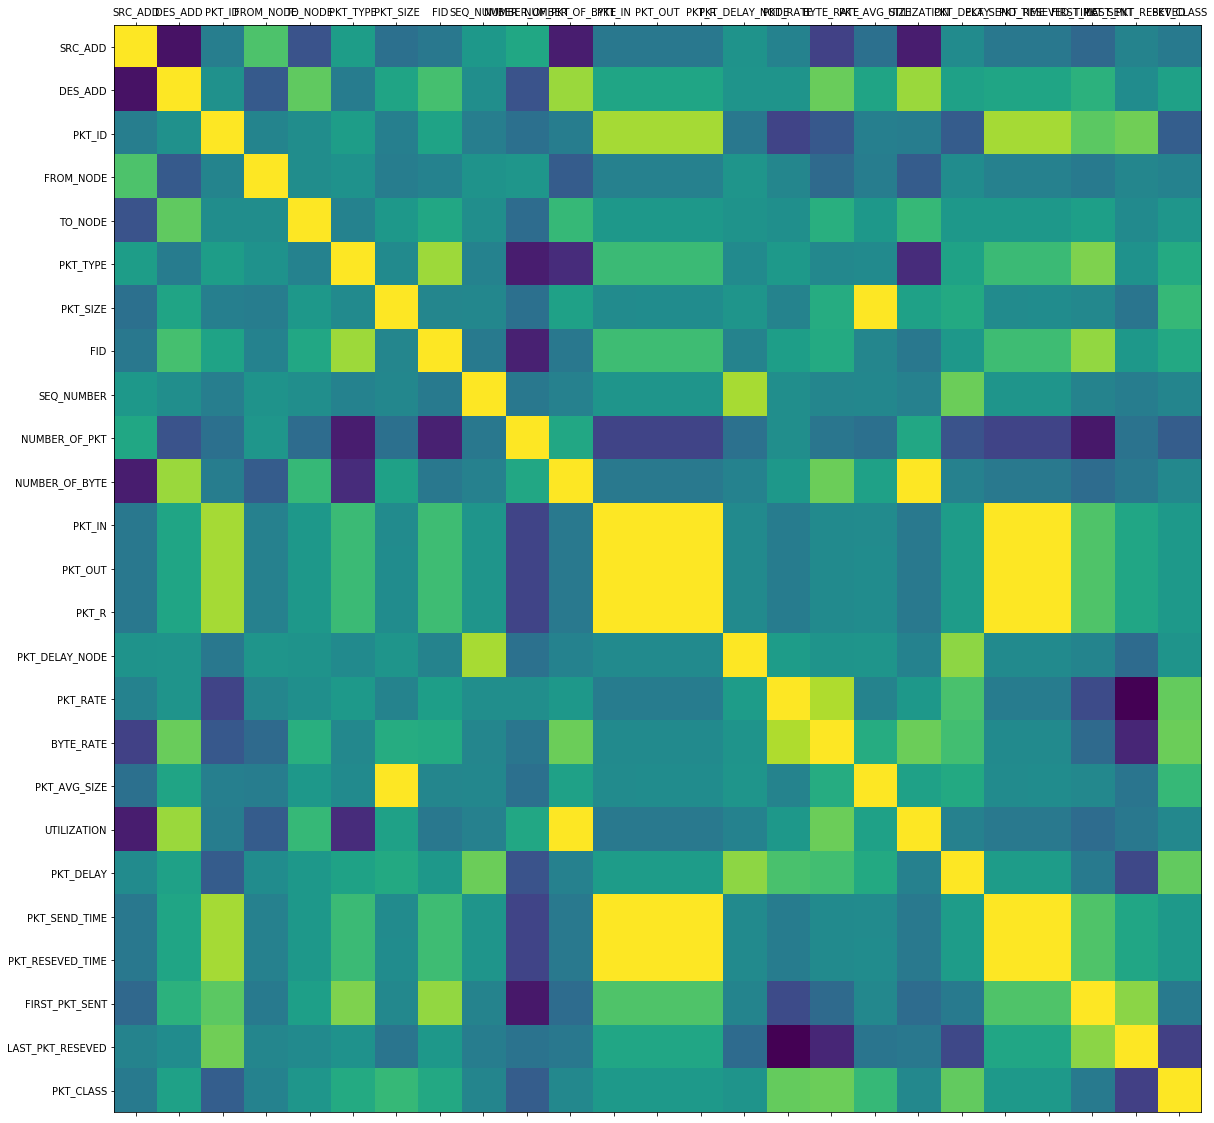

In [13]:
str="correlations"
fig=plt.figure(figsize=(350,300))
plot_corr(df)


# Correlation Matrix with Heatmap


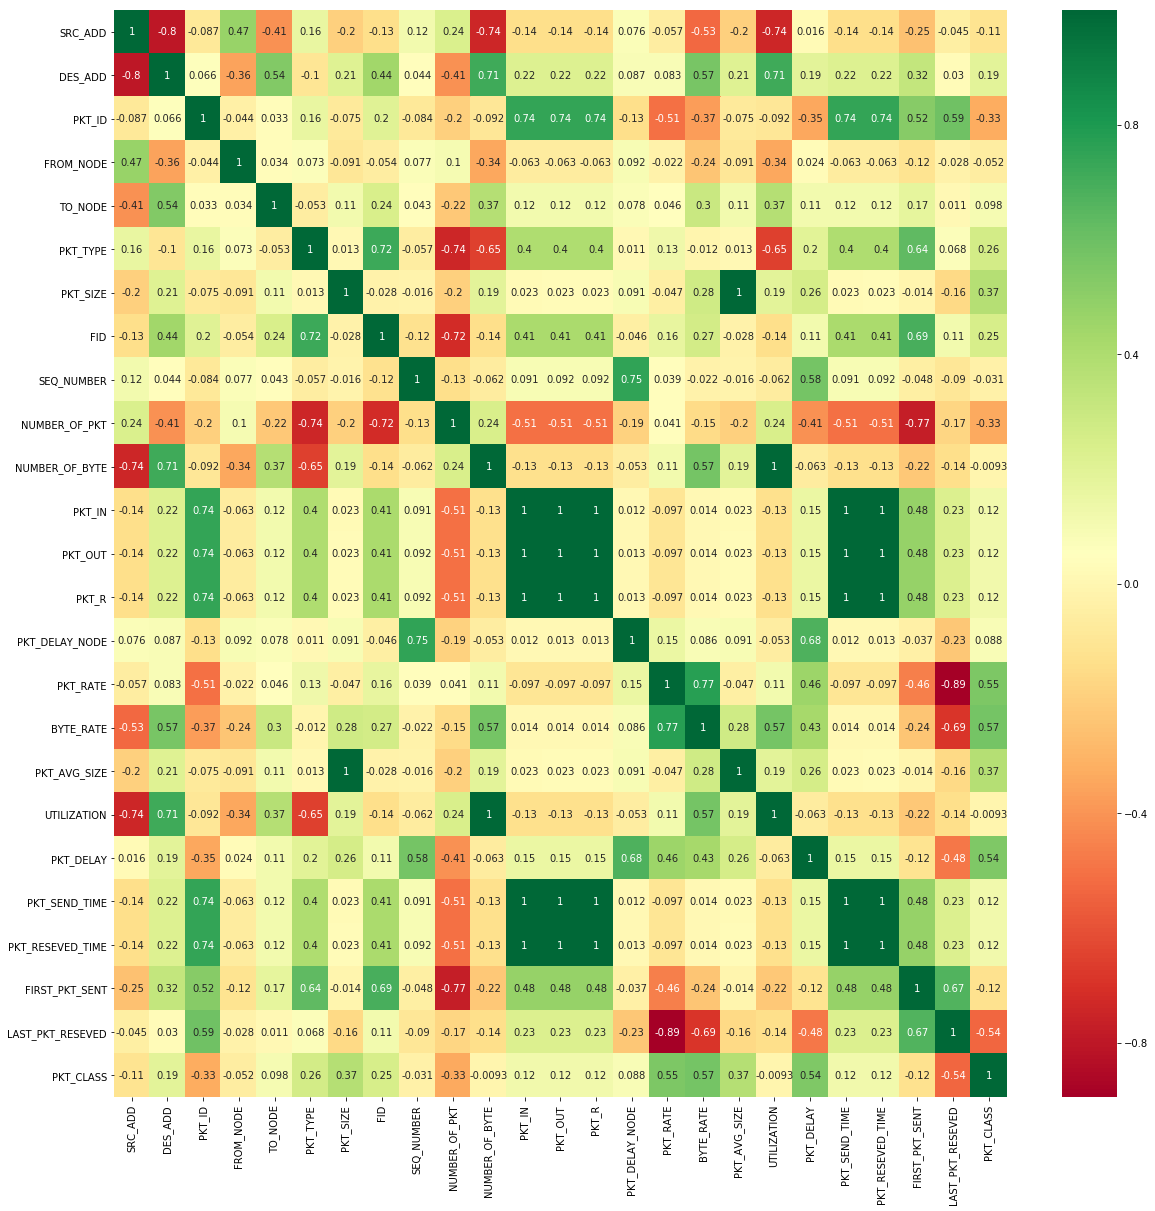

In [14]:
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
df.drop(['NODE_NAME_FROM'], inplace=True, axis=1, errors='ignore')
df.drop(['NODE_NAME_TO'], inplace=True, axis=1, errors='ignore')

In [16]:
import pandas as pd
 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(10)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_IN,PKT_OUT,PKT_R,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,1,1540,4,11339,16091,24780100,35.529786,35.529786,35.539909,0.000000,328.240918,505490.0,1540.0,0.236321,0.000000,35.519662,35.550032,1.000000,50.021920,1
1,15.00,24.15,201196,23,24,1,1540,16,6274,16092,24781700,20.176725,20.176725,20.186848,0.000000,328.205808,505437.0,1540.0,0.236337,0.000000,20.156478,20.186848,1.000000,50.030211,1
2,24.15,15.00,61905,23,22,2,55,16,1930,16092,885060,7.049955,7.049955,7.059958,0.000000,328.206042,18051.3,55.0,0.008441,0.000000,7.039952,7.069962,1.030045,50.060221,2
3,24.90,9.00,443135,23,21,2,55,10,12670,16085,884675,39.627970,39.627970,39.637973,0.000000,328.064183,18043.5,55.0,0.008437,0.000000,39.617967,39.647976,1.030058,50.060098,1
4,24.80,8.00,157335,23,21,2,55,9,4901,16088,884840,16.039806,16.039806,16.049810,0.000000,328.113525,18046.2,55.0,0.008438,0.000000,16.029803,16.059813,1.030054,50.061864,1
5,24.10,1.00,219350,21,1,2,55,2,6837,16091,885005,21.885768,21.885768,21.895771,0.000000,328.297902,18056.4,55.0,0.008440,0.000000,21.865762,21.895771,1.030016,50.043427,1
6,24.13,13.00,480053,24,23,2,55,14,13609,16103,885665,42.450320,42.450320,42.460323,0.000000,328.460278,18065.3,55.0,0.008446,0.000000,42.450320,42.480330,1.030032,50.055747,1
7,2.10,24.22,599411,23,24,3,1000,23,4156,6250,6250000,58.268320,58.268480,58.278560,0.000160,124.943625,124944.0,1000.0,0.059605,0.000320,58.248000,58.278560,25.000000,75.022560,1
8,24.20,2.00,551227,24,23,2,55,3,15392,16091,885005,47.910078,47.910078,47.920081,0.000000,328.264120,18054.5,55.0,0.008440,0.000000,47.910078,47.940088,1.030022,50.048477,1
9,2.00,24.20,399941,21,23,1,1540,3,11595,16091,24780100,36.314926,36.315480,36.325603,0.000554,328.264040,505526.0,1540.0,0.236321,0.001724,36.304803,36.336896,1.000000,50.018467,1


# Feature Importance


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.00658686 0.01233072 0.10706248 0.00102412 0.00316365 0.05631513
 0.01737024 0.01116617 0.0629138  0.11115264 0.0255385  0.02977196
 0.03096045 0.0301856  0.00326912 0.17803338 0.23698908 0.00620423
 0.0570654  0.01289646]


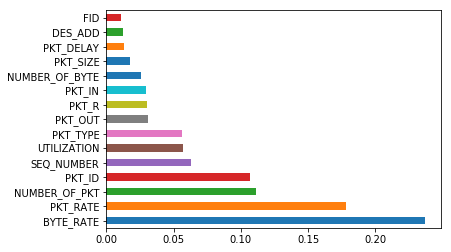

In [17]:

X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [18]:
df.drop(['SRC_ADD'], inplace=True, axis=1, errors='ignore')
df.drop(['DES_ADD'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_ID'], inplace=True, axis=1, errors='ignore')
df.drop(['SEQ_NUMBER'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_SIZE'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_IN'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_OUT'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_R'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_DELAY_NODE'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_SEND_TIME'], inplace=True, axis=1, errors='ignore')
df.drop(['PKT_RESEVED_TIME'], inplace=True, axis=1, errors='ignore')
df.drop(['FIRST_PKT_SENT'], inplace=True, axis=1, errors='ignore')
df.drop(['LAST_PKT_RESEVED'], inplace=True, axis=1, errors='ignore')

In [19]:
df.head(10)

,FROM_NODE,TO_NODE,PKT_TYPE,FID,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_CLASS
0,21,23,1,4,16091,24780100,328.240918,505490.0,1540.0,0.236321,0.000000,1
1,23,24,1,16,16092,24781700,328.205808,505437.0,1540.0,0.236337,0.000000,1
2,23,22,2,16,16092,885060,328.206042,18051.3,55.0,0.008441,0.000000,2
3,23,21,2,10,16085,884675,328.064183,18043.5,55.0,0.008437,0.000000,1
4,23,21,2,9,16088,884840,328.113525,18046.2,55.0,0.008438,0.000000,1
5,21,1,2,2,16091,885005,328.297902,18056.4,55.0,0.008440,0.000000,1
6,24,23,2,14,16103,885665,328.460278,18065.3,55.0,0.008446,0.000000,1
7,23,24,3,23,6250,6250000,124.943625,124944.0,1000.0,0.059605,0.000320,1
8,24,23,2,3,16091,885005,328.264120,18054.5,55.0,0.008440,0.000000,1
9,21,23,1,3,16091,24780100,328.264040,505526.0,1540.0,0.236321,0.001724,1


In [31]:
num_obs = len(df)
num_true = len(df.loc[df['PKT_CLASS'] == 1])
num_false2 = len(df.loc[df['PKT_CLASS'] == 2])
num_false3 = len(df.loc[df['PKT_CLASS'] == 3])
num_false4 = len(df.loc[df['PKT_CLASS'] == 4])
num_false5 = len(df.loc[df['PKT_CLASS'] == 5])
num_false=num_false2+num_false3+num_false4+num_false5

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  939648 (89.61%)
Number of False cases: 108927 (10.39%)


In [32]:
X=df.drop("PKT_CLASS",axis=1)
y=df["PKT_CLASS"]

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2959)
#print(random_state)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

80.00% in training set
20.00% in test set


In [38]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['PKT_CLASS'] == 1]), (len(df.loc[df['PKT_CLASS'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['PKT_CLASS'] == 2]), (len(df.loc[df['PKT_CLASS'] == 2])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['PKT_CLASS'] == 3]), (len(df.loc[df['PKT_CLASS'] == 3])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['PKT_CLASS'] == 4]), (len(df.loc[df['PKT_CLASS'] == 4])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['PKT_CLASS'] == 5]), (len(df.loc[df['PKT_CLASS'] == 5])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 2]), (len(y_train[y_train[:] == 2])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 3]), (len(y_train[y_train[:] == 3])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 4]), (len(y_train[y_train[:] == 4])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 5]), (len(y_train[y_train[:] == 5])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 2]), (len(y_test[y_test[:] == 2])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 3]), (len(y_test[y_test[:] == 3])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 4]), (len(y_test[y_test[:] == 4])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 5]), (len(y_test[y_test[:] == 5])/len(y_test) * 100.0)))

Original True  : 939648 (89.61%)
Original False : 97521 (9.30%)
Original False : 6211 (0.59%)
Original False : 3198 (0.30%)
Original False : 1997 (0.19%)

Training True  : 751924 (89.64%)
Training False : 77852 (9.28%)
Training False : 4946 (0.59%)
Training False : 2557 (0.30%)
Training False : 1581 (0.19%)

Test True      : 187724 (89.51%)
Test False     : 19669 (9.38%)
Test False     : 1265 (0.60%)
Test False     : 641 (0.31%)
Test False     : 416 (0.20%)


In [39]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=701)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight="balanced",random_state=701)#,criterion="entropy")      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=701,
            verbose=0, warm_start=False)

In [40]:
predictions_train_rf=rf_model.predict(X_train)
predictions_test_rf=rf_model.predict(X_test)

In [44]:
from sklearn import metrics
print("Classification Report For Training Data:- \n",metrics.classification_report(y_train,predictions_train_rf))
print("Classification Report For Testing Data:- \n",metrics.classification_report(y_test,predictions_test_rf))

Classification Report For Training Data:- 
              precision    recall  f1-score   support

          1       0.99      0.97      0.98    751801
          2       0.98      0.91      0.94     77947
          3       0.08      0.45      0.14      4994
          4       0.83      0.95      0.88      2532
          5       1.00      0.95      0.97      1586

avg / total       0.98      0.96      0.97    838860

Classification Report For Testing Data:- 
              precision    recall  f1-score   support

          1       0.99      0.96      0.97    187847
          2       0.98      0.90      0.94     19574
          3       0.06      0.34      0.11      1217
          4       0.82      0.95      0.88       666
          5       0.97      0.93      0.95       411

avg / total       0.98      0.95      0.97    209715



In [45]:
print("Confusion Matrix For Training Data:- \n",metrics.confusion_matrix(y_train,predictions_train_rf))
print("Confusion Matrix For Testing Data:- \n",metrics.confusion_matrix(y_test,predictions_test_rf))

Confusion Matrix For Training Data:- 
 [[725772   1289  24444    294      2]
 [  7034  70690    217      6      0]
 [  2614      0   2252    127      1]
 [   126      0      6   2400      0]
 [     1      0      0     76   1509]]
Confusion Matrix For Testing Data:- 
 [[181148    426   6193     72      8]
 [  1942  17585     45      2      0]
 [   761      1    416     35      4]
 [    29      0      4    633      0]
 [     0      0      3     26    382]]


In [46]:
print("Accuracy Score For Training Data:- ",metrics.accuracy_score(y_train,predictions_train_rf)*100,"%")
print("Accuracy Score For Testing Data:- ",metrics.accuracy_score(y_test,predictions_test_rf)*100,"%")

Accuracy Score For Training Data:-  95.68020885487446 %
Accuracy Score For Testing Data:-  95.44572395870587 %


In [47]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [49]:
predictions_train_nb=nb_model.predict(X_train)
predictions_test_nb=nb_model.predict(X_test)

In [50]:
from sklearn import metrics

In [51]:
print("Classification Report For Training Data:- \n",metrics.classification_report(y_train,predictions_train_nb))
print("Classification Report For Testing Data:- \n",metrics.classification_report(y_test,predictions_test_nb))

Classification Report For Training Data:- 
              precision    recall  f1-score   support

          1       0.98      1.00      0.99    751658
          2       1.00      0.89      0.94     78143
          3       0.00      0.00      0.00      4945
          4       0.89      0.94      0.91      2533
          5       0.46      0.90      0.61      1581

avg / total       0.98      0.98      0.98    838860

Classification Report For Testing Data:- 
              precision    recall  f1-score   support

          1       0.98      1.00      0.99    187990
          2       1.00      0.89      0.94     19378
          3       0.00      0.00      0.00      1266
          4       0.89      0.95      0.92       665
          5       0.49      0.90      0.63       416

avg / total       0.98      0.98      0.98    209715



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
print("Confusion Matrix For Training Data:- \n",metrics.confusion_matrix(y_train,predictions_train_nb))
print("Confusion Matrix For Testing Data:- \n",metrics.confusion_matrix(y_test,predictions_test_nb))

Confusion Matrix For Training Data:- 
 [[751555      0      0     81     22]
 [  8529  69614      0      0      0]
 [  3170      0      0    139   1636]
 [   151      0      0   2382      0]
 [    67      0      0     86   1428]]
Confusion Matrix For Testing Data:- 
 [[187961      0      0     23      6]
 [  2138  17240      0      0      0]
 [   851      0      0     32    383]
 [    32      0      0    633      0]
 [    20      0      0     23    373]]


In [53]:
print("Accuracy Score For Training Data:- ",metrics.accuracy_score(y_train,predictions_train_nb)*100,"%")
print("Accuracy Score For Testing Data:- ",metrics.accuracy_score(y_test,predictions_test_nb)*100,"%")

Accuracy Score For Training Data:-  98.3452542736571 %
Accuracy Score For Testing Data:-  98.32725365376821 %


In [54]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
predictions_train_knn=knn_model.predict(X_train)
predictions_test_knn=knn_model.predict(X_test)


In [57]:
from sklearn import metrics
print("Classification Report For Training Data:- \n",metrics.classification_report(y_train,predictions_train_knn))
print("Classification Report For Testing Data:- \n",metrics.classification_report(y_test,predictions_test_knn))

Classification Report For Training Data:- 
              precision    recall  f1-score   support

          1       0.99      1.00      0.99    751658
          2       1.00      0.90      0.95     78143
          3       1.00      0.33      0.49      4945
          4       0.89      0.94      0.91      2533
          5       0.97      0.94      0.96      1581

avg / total       0.99      0.99      0.99    838860

Classification Report For Testing Data:- 
              precision    recall  f1-score   support

          1       0.99      1.00      0.99    187990
          2       1.00      0.90      0.95     19378
          3       1.00      0.30      0.46      1266
          4       0.89      0.95      0.92       665
          5       0.98      0.94      0.96       416

avg / total       0.99      0.99      0.98    209715



In [58]:
print("Confusion Matrix For Training Data:- \n",metrics.confusion_matrix(y_train,predictions_train_knn))
print("Confusion Matrix For Testing Data:- \n",metrics.confusion_matrix(y_test,predictions_test_knn))

Confusion Matrix For Training Data:- 
 [[751557      0      0     78     23]
 [  7712  70431      0      0      0]
 [  3170      0   1614    138     23]
 [   151      0      0   2381      1]
 [     2      0      3     85   1491]]
Confusion Matrix For Testing Data:- 
 [[187963      0      0     21      6]
 [  1961  17417      0      0      0]
 [   851      0    380     32      3]
 [    32      0      0    633      0]
 [     2      0      0     23    391]]


In [59]:
print("Accuracy Score For Training Data:- ",metrics.accuracy_score(y_train,predictions_train_knn)*100,"%")
print("Accuracy Score For Testing Data:- ",metrics.accuracy_score(y_test,predictions_test_knn)*100,"%")

Accuracy Score For Training Data:-  98.64268173473523 %
Accuracy Score For Testing Data:-  98.60238895644089 %
